<a href="https://colab.research.google.com/github/sagasucksatlife1/QunatProjects/blob/main/creditpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv('/content/df1_loan.csv')

df= df.drop(['Unnamed: 0', 'Loan_ID'], axis= 1)
df.columns
x= df.drop('Loan_Status', axis =1)
y = df['Loan_Status']

x= x.fillna(method = "bfill")
x.head()



/tmp/ipython-input-1432146904.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x= x.fillna(method = "bfill")


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,$5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,$6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,$3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,$4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,$6000.0


splitting the data into two datasets x and y where x is the features and y is the target
Removing the unwated columns from x.
filling all the null values with the backfill method as in the forward fill method we get a nan in the top columns which cannot be replaced by the value before it


In [ ]:
#encodding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])
x['Married']= le.fit_transform(x['Married'])
x['Dependents']= le.fit_transform(x['Dependents'])
x['Education']= le.fit_transform(x['Education'])
x['Self_Employed']= le.fit_transform(x['Self_Employed'])
x['Property_Area']= le.fit_transform(x['Property_Area'])
x.head()
y= le.fit_transform(y)



Since a lot of data was present in the string format not understood by the model thus encoding the data. using the label-encoding here as the given data was nominal in nature.

In [ ]:
from google.colab import files
x.to_csv('X_features.csv', index=False)
#files.download('X_features.csv')
print(y)

[1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1
 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 1 0 1 1 1 

In [ ]:
#training the l_r model now ...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
if 'Total_Income' in x.columns:
    # Ensure it's treated as string to apply .str methods
    x['Total_Income'] = x['Total_Income'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
lm = LogisticRegression()
lm.fit(x_train, y_train)
lm.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

BIG ERROR = the given last column had a Dollar ($) sign in the  value which had an error which splitting the data.
after splitting the data into train and test we go ahead and tarin the data with logisticRegression. No normalzation was needed here.

In [ ]:
import numpy as np

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Get predictions
y_pred = lm.predict(x_test)
y_pred_proba = lm.predict_proba(x_test)[:, 1]

# Calculate metrics
accuracy_score_LogisticRegression = accuracy_score(y_test, y_pred)
precision_LogisticRegression = precision_score(y_test, y_pred)
recall_LogisticRegression = recall_score(y_test, y_pred)
f1_LogisticRegression = f1_score(y_test, y_pred)
auc_LogisticRegression = roc_auc_score(y_test, y_pred_proba)

# Print results
print("LOGISTIC REGRESSION RESULTS:")
print(f"Accuracy:  {accuracy_score_LogisticRegression:.3f}")
print(f"Precision: {precision_LogisticRegression:.3f}")
print(f"Recall:    {recall_LogisticRegression:.3f}")
print(f"F1 Score:  {f1_LogisticRegression:.3f}")
print(f"AUC:       {auc_LogisticRegression:.3f}")

LOGISTIC REGRESSION RESULTS:
Accuracy:  0.830
Precision: 0.817
Recall:    0.971
F1 Score:  0.887
AUC:       0.788


in this step we predcit the values of the X_test data we had to predict the y _pred array and ten we compare it with y_test data that we already had to find the accuracy of the model.
We use multiple metrics to check for tackle imbalance if imbalanced dataset was present.
RESULT=
Accuracy:  0.830
Precision: 0.817
Recall:    0.971
F1 Score:  0.887
AUC:       0.788

In [ ]:
#random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)
rf= RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=100)
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)
print(y_pred)
accuracy_score_RandomForest = accuracy_score(y_test, y_pred)
f1__RandomForest = f1_score(y_test,y_pred)
auc__RandomForest = roc_auc_score(y_test,y_pred)
print("RANDOM FOREST RESULTS:")
print(f"Accuracy:  {accuracy_score_RandomForest:.3f}")
print(f"F1 Score:  {f1__RandomForest:.3f}")
print(f"AUC:       {auc__RandomForest:.3f}")



[1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1]
RANDOM FOREST RESULTS:
Accuracy:  0.820
F1 Score:  0.880
AUC:       0.736


Using the random forest to see if it predicts the dataset in a better way.
RANDOM FOREST RESULTS:
Accuracy:  0.820
F1 Score:  0.880
AUC:       0.736
actually worse then the logisticRegression.

In [ ]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
xgb = XGBClassifier(n_estimators=100, max_depth=10)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
print(y_pred)

accuracy_score_XGBoost = accuracy_score(y_test, y_pred)
f1_XGBoost = f1_score(y_test, y_pred)
auc_XGBoost = roc_auc_score(y_test, y_pred)

print("XGBOOST RESULTS:")
print(f"Accuracy:  {accuracy_score_XGBoost:.3f}")
print(f"F1 Score:  {f1_XGBoost:.3f}")
print(f"AUC:       {auc_XGBoost:.3f}")

[1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1]
XGBOOST RESULTS:
Accuracy:  0.790
F1 Score:  0.853
AUC:       0.732


Using the XG Boost to see if it predicts the dataset in a better way.
XGBOOST RESULTS:
Accuracy:  0.790
F1 Score:  0.853
AUC:       0.732
actually worse then the RandomForest on all Parameter.

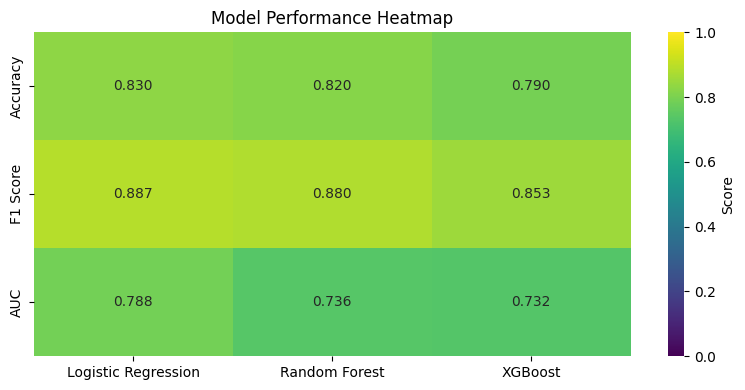

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

results_dict = {
    'Logistic Regression': [accuracy_score_LogisticRegression, f1_LogisticRegression, auc_LogisticRegression],
    'Random Forest': [accuracy_score_RandomForest, f1__RandomForest, auc__RandomForest],
    'XGBoost': [accuracy_score_XGBoost, f1_XGBoost, auc_XGBoost]
}

df_heatmap = pd.DataFrame(results_dict,
                          index=['Accuracy', 'F1 Score', 'AUC'])

plt.figure(figsize=(8, 4))
sns.heatmap(df_heatmap, annot=True, cmap='viridis', fmt='.3f',
            vmin=0, vmax=1, cbar_kws={'label': 'Score'})
plt.title('Model Performance Heatmap')
plt.tight_layout()
plt.show()

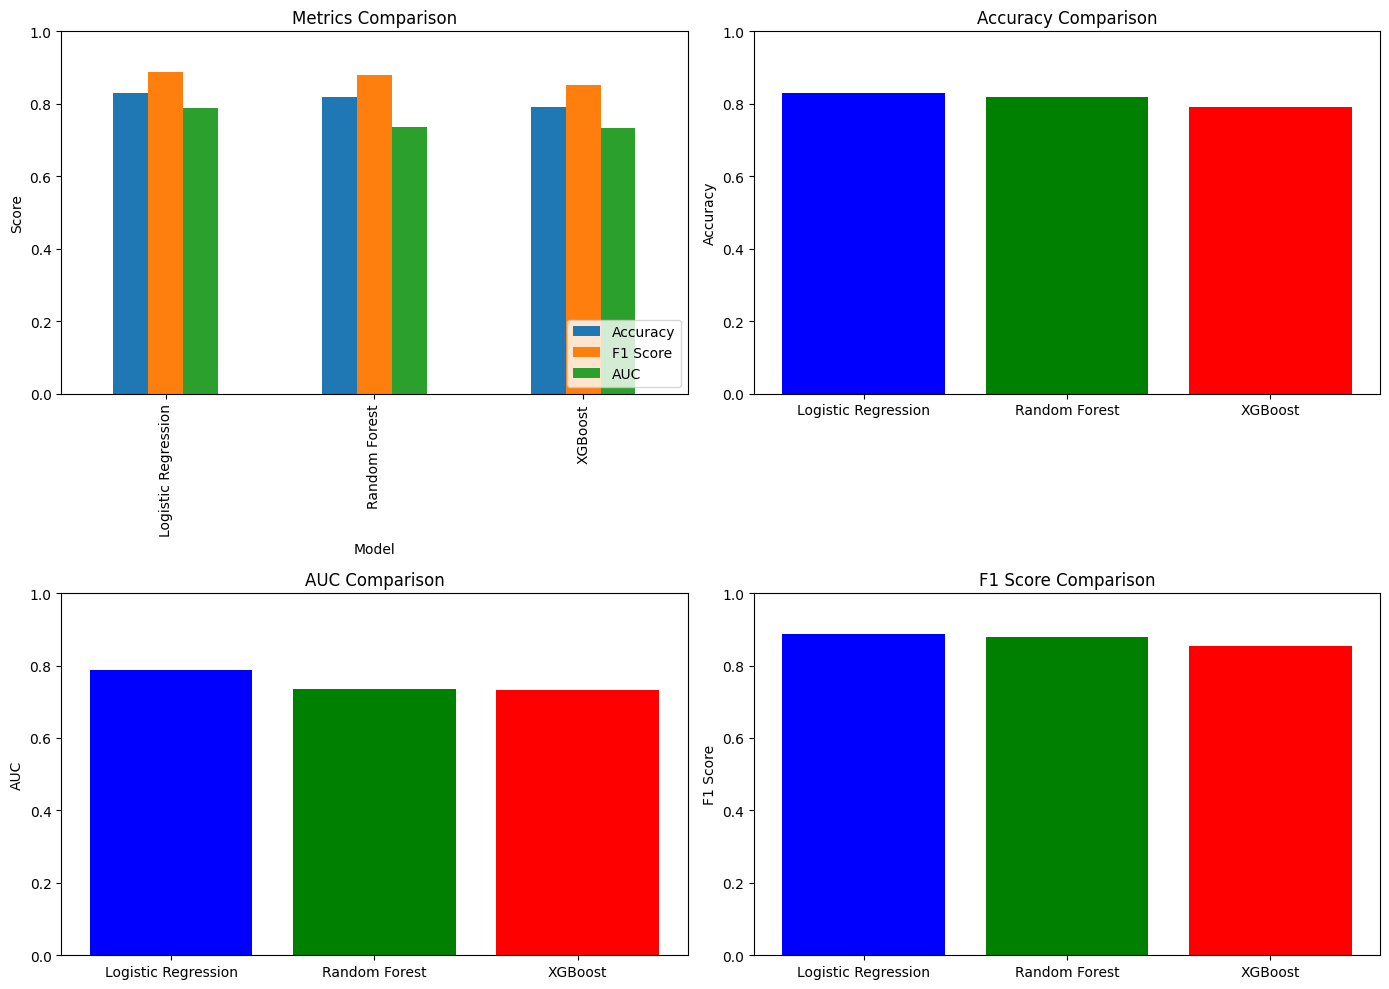

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract data from the existing results_dict
models = list(results_dict.keys())
accuracy = [results_dict[model][0] for model in models]
f1 = [results_dict[model][1] for model in models]
auc = [results_dict[model][2] for model in models]

# Create a DataFrame for easier plotting of all metrics together
results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'F1 Score': f1,
    'AUC': auc
})

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar chart
results.set_index('Model').plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Metrics Comparison')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].legend(loc='lower right')
#accuracy comparision
axes[0, 1].bar(models, accuracy, color=['blue', 'green', 'red'])
axes[0, 1].set_title('Accuracy Comparison')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_ylim(0, 1)

# AUC comparison
axes[1, 0].bar(models, auc, color=['blue', 'green', 'red'])
axes[1, 0].set_title('AUC Comparison')
axes[1, 0].set_ylabel('AUC')
axes[1, 0].set_ylim(0, 1)

# F1 comparison
axes[1, 1].bar(models, f1, color=['blue', 'green', 'red'])
axes[1, 1].set_title('F1 Score Comparison')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

Comparing all the redings out all the tree models and we see that logistic Regression ended up being the best and then Randomforest and then XGboost. Order (LgR>RF>XG)
before the preject the assumption i had was (LgR<RF<XG).
**Possible reason-- well maybe beacuse the data was very less nd even though i tried to tackle overfitting it mught have still occured and the model started to memorising the testing dataset not leaning the pattern and maybe the dta was less that could be a reason as well or maybe if we dived a little deeper the feature importance cuvre would have been uneven making the more noise data in the dataset have given more imporatnce by the latter models**


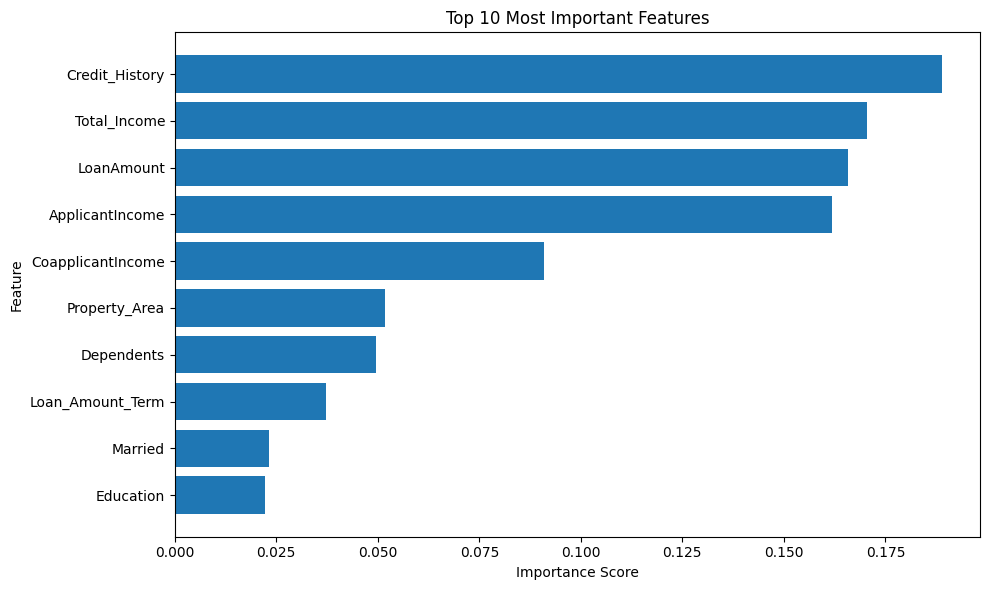


feature importance:
Credit_History      : 0.1889 (18.89%)
Total_Income        : 0.1704 (17.04%)
LoanAmount          : 0.1659 (16.59%)
ApplicantIncome     : 0.1619 (16.19%)
CoapplicantIncome   : 0.0910 (9.10%)
Property_Area       : 0.0519 (5.19%)
Dependents          : 0.0496 (4.96%)
Loan_Amount_Term    : 0.0374 (3.74%)
Married             : 0.0231 (2.31%)
Education           : 0.0222 (2.22%)
Gender              : 0.0218 (2.18%)
Self_Employed       : 0.0159 (1.59%)


In [ ]:

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': importance
}).sort_values('importance', ascending=False)

#plotting horizontal plot
plt.figure(figsize=(10, 6))
top_10 = feature_importance_df.head(10)
plt.barh(top_10['feature'], top_10['importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


print("\nfeature importance:")
for idx, row in feature_importance_df.iterrows():
    print(f"{row['feature']:20s}: {row['importance']:.4f} ({row['importance']*100:.2f}%)")

look at the imbalance in the feature importance where a lot of these data are so important and some are so less important. this along with the overfitting might have been the cause of this bad performance ...

Feature Importance (Percentage):
Credit_History      : 0.1889 (18.89%)
Total_Income        : 0.1704 (17.04%)
LoanAmount          : 0.1659 (16.59%)
ApplicantIncome     : 0.1619 (16.19%)
CoapplicantIncome   : 0.0910 (9.10%)
Property_Area       : 0.0519 (5.19%)
Dependents          : 0.0496 (4.96%)
Loan_Amount_Term    : 0.0374 (3.74%)
Married             : 0.0231 (2.31%)
Education           : 0.0222 (2.22%)
Gender              : 0.0218 (2.18%)
Self_Employed       : 0.0159 (1.59%